## 1. Bitly

In [2]:

from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [3]:
path = "datasets/bitly_usagov/example.txt"

In [4]:
import json

path = "datasets/bitly_usagov/example.txt"

# Đọc dữ liệu
with open(path) as f:
    records = [json.loads(line) for line in f]

# In 5 bản ghi đầu tiên
for i, rec in enumerate(records[:5], 1):
    print(f"Record {i}: {rec}")


Record 1: {'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}
Record 2: {'a': 'GoogleMaps/RochesterNY', 'c': 'US', 'nk': 0, 'tz': 'America/Denver', 'gr': 'UT', 'g': 'mwszkS', 'h': 'mwszkS', 'l': 'bitly', 'hh': 'j.mp', 'r': 'http://www.AwareMap.com/', 'u': 'http://www.monroecounty.gov/etc/911/rss.php', 't': 1331923249, 'hc': 1308262393, 'cy': 'Provo', 'll': [40.218102, -111.613297]}
Record 3: {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoPath.3)

In [5]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [ ]:
time_zones = [rec["tz"] for rec in records]

##### Lấy các dòng có tz

In [56]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

In [57]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [58]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [59]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [60]:
counts = get_counts(time_zones)
counts["America/New_York"]
len(time_zones)

3440

In [61]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [62]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [63]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

<Axes: ylabel='tz'>

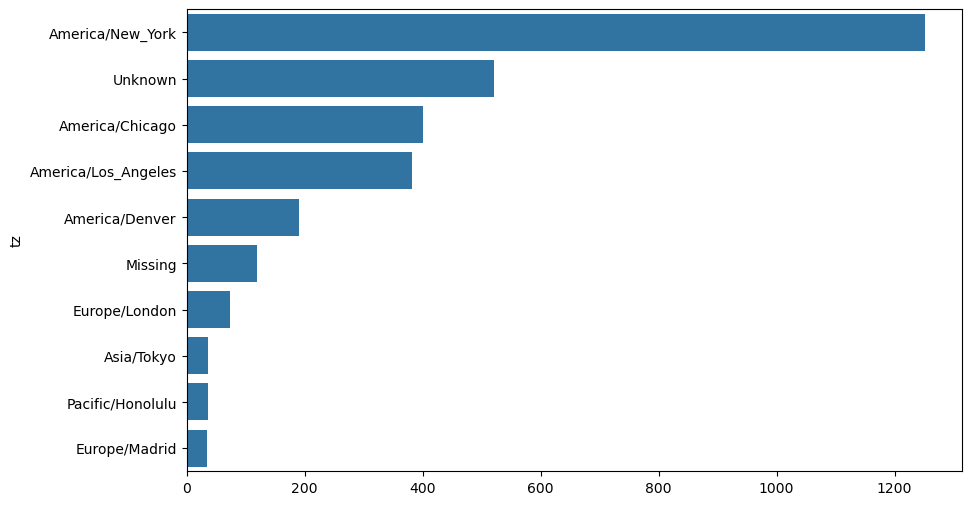

In [65]:
import seaborn as sns
subset = tz_counts.head(10)
sns.barplot(y=subset.index, x=subset.to_numpy())

In [49]:
frame = pd.DataFrame(records)

In [50]:
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [51]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [52]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [53]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Axes: ylabel='tz'>

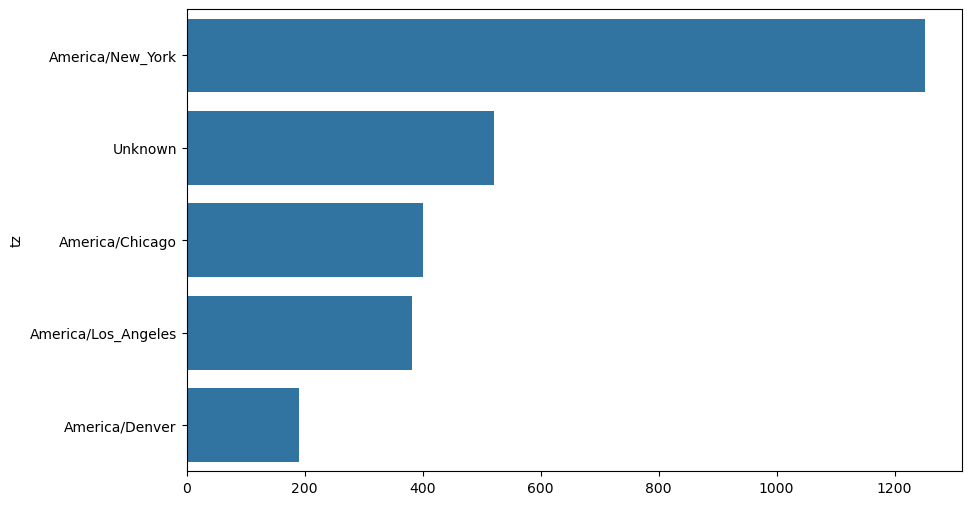

In [54]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [21]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [22]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [23]:
cframe = frame[frame["a"].notna()].copy()

In [24]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [25]:
by_tz_os = cframe.groupby(["tz", "os"])

In [26]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [27]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [28]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [29]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [30]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total', ylabel='tz'>

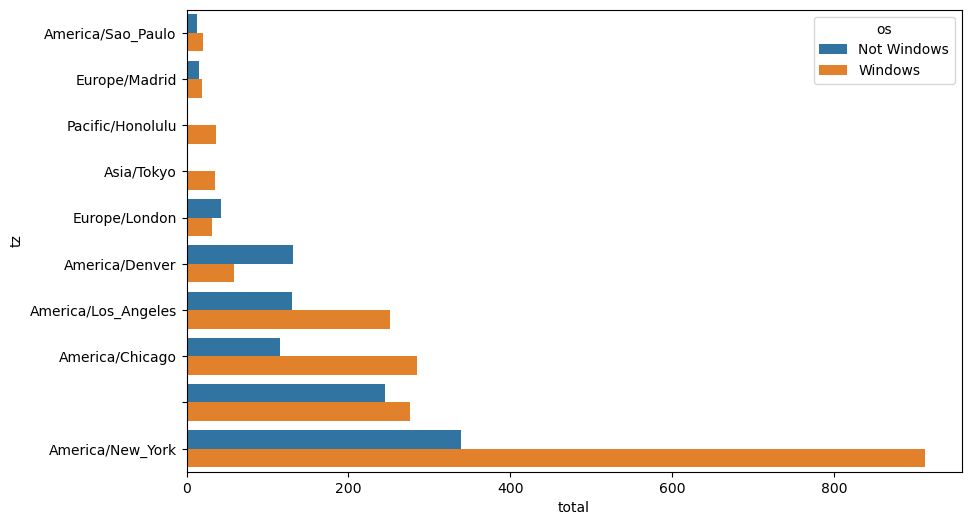

In [31]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

In [32]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

C:\Users\HP\AppData\Local\Temp\ipykernel_18536\1595230757.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


In [33]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='normed_total', ylabel='tz'>

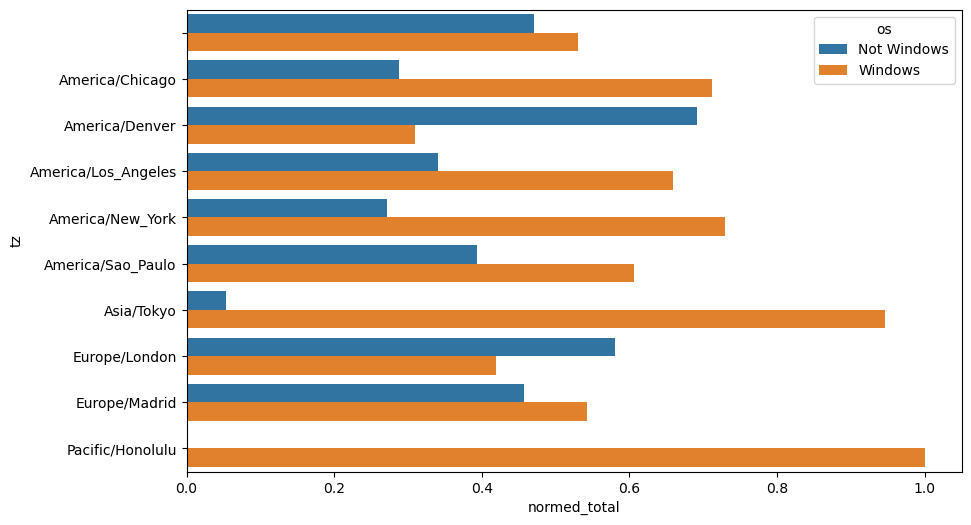

In [34]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

In [35]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

## 2. MovieLens 

In [3]:
import pandas as pd

unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [4]:
users.head(5)
ratings.head(5)
movies.head(5)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [6]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [7]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [25]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M,rating_count
title,,,
"'burbs, The (1989)",2.793478,2.962085,303
10 Things I Hate About You (1999),3.646552,3.311966,700
101 Dalmatians (1961),3.791444,3.500000,565
101 Dalmatians (1996),3.240000,2.911215,364
12 Angry Men (1957),4.184397,4.328421,616
...,...,...,...
Young Guns (1988),3.371795,3.425620,562
Young Guns II (1990),2.934783,2.904025,369
Young Sherlock Holmes (1985),3.514706,3.363344,379


#### 3.1 

In [26]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

In [27]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head(10)

gender,F,M,rating_count
title,,,
"Close Shave, A (1995)",4.644444,4.473795,657
"Wrong Trousers, The (1993)",4.588235,4.478261,882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589,470
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075,438
Schindler's List (1993),4.562602,4.491415,2304
"Shawshank Redemption, The (1994)",4.539075,4.560625,2227
"Grand Day Out, A (1992)",4.537879,4.293255,473
To Kill a Mockingbird (1962),4.536667,4.372611,928
Creature Comforts (1990),4.513889,4.272277,274


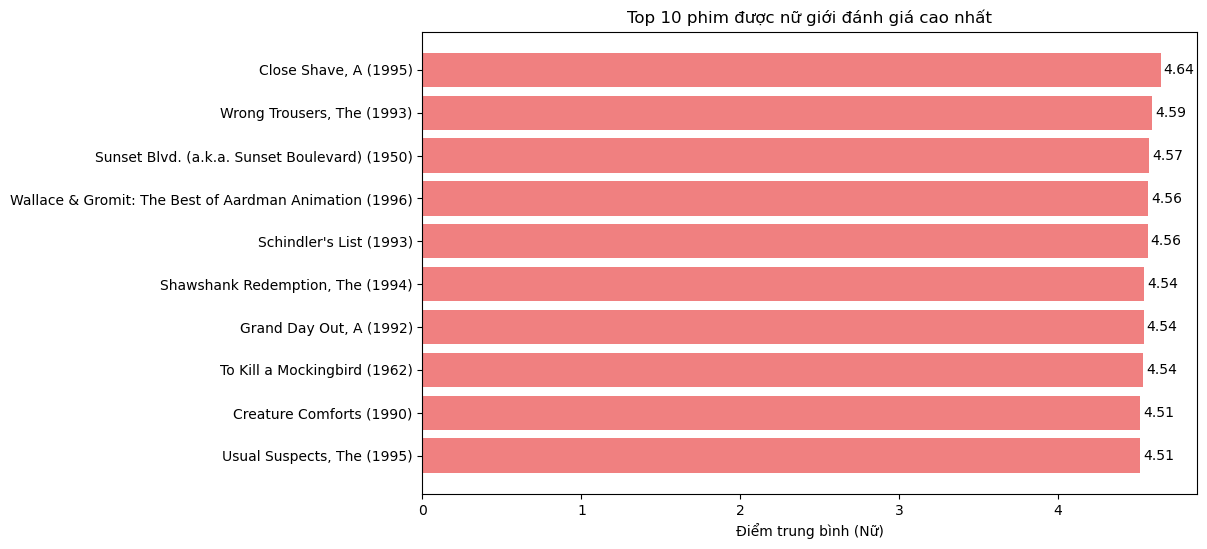

In [29]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_female_ratings.index, top_female_ratings["F"], color="lightcoral")
plt.xlabel("Điểm trung bình (Nữ)")
plt.title("Top 10 phim được nữ giới đánh giá cao nhất")
plt.gca().invert_yaxis()

# hiển thị giá trị điểm
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va="center")

plt.show()


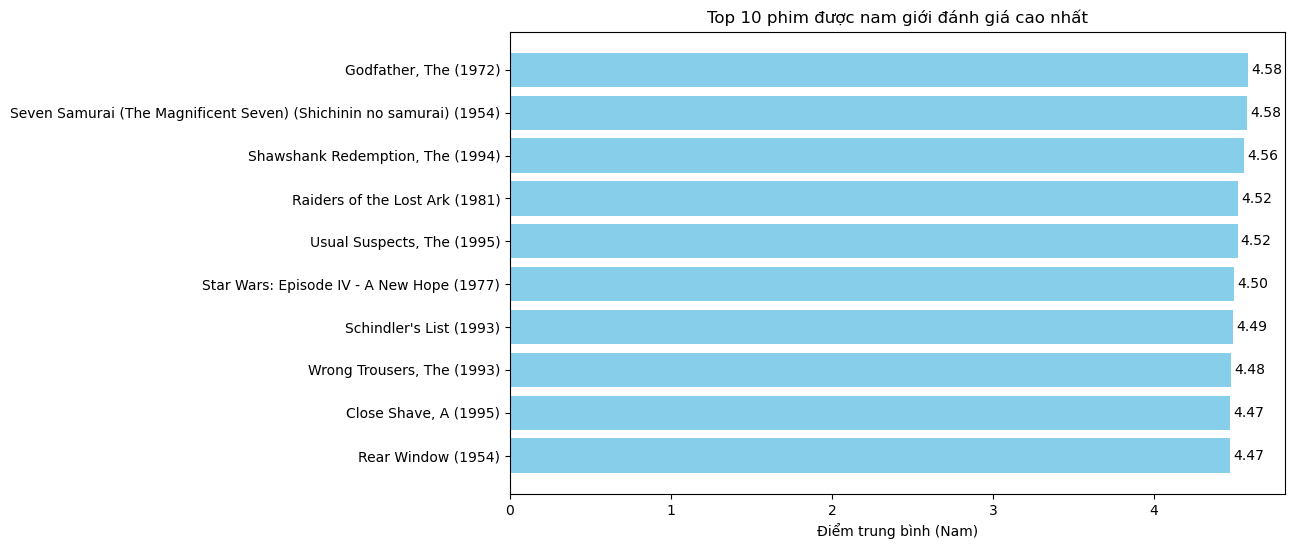

In [9]:
# Lấy top 10 phim được nam giới đánh giá cao nhất
top_male_ratings = mean_ratings.sort_values("M", ascending=False).head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.barh(top_male_ratings.index, top_male_ratings["M"], color="skyblue")
plt.xlabel("Điểm trung bình (Nam)")
plt.title("Top 10 phim được nam giới đánh giá cao nhất")
plt.gca().invert_yaxis()

# Hiển thị giá trị điểm ngay trên thanh
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va="center")

plt.show()


#### 3.2

In [30]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [33]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head(10)

gender,F,M,rating_count,diff
title,,,,
Dirty Dancing (1987),3.790378,2.959596,687,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,374,-0.676359
Grease (1978),3.975265,3.367041,817,-0.608224
Little Women (1994),3.870588,3.321739,285,-0.548849
Steel Magnolias (1989),3.901734,3.365957,408,-0.535777
Anastasia (1997),3.800000,3.281609,304,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,1233,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,450,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,295,-0.487561


In [34]:
sorted_by_diff[::-1].head(10)

gender,F,M,rating_count,diff
title,,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,822,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,305,0.676359
Dumb & Dumber (1994),2.697987,3.336595,660,0.638608
"Longest Day, The (1962)",3.411765,4.031447,352,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,385,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,548,0.611985
"Hidden, The (1987)",3.137931,3.745098,284,0.607167
Rocky III (1982),2.361702,2.943503,401,0.581801
Caddyshack (1980),3.396135,3.969737,967,0.573602


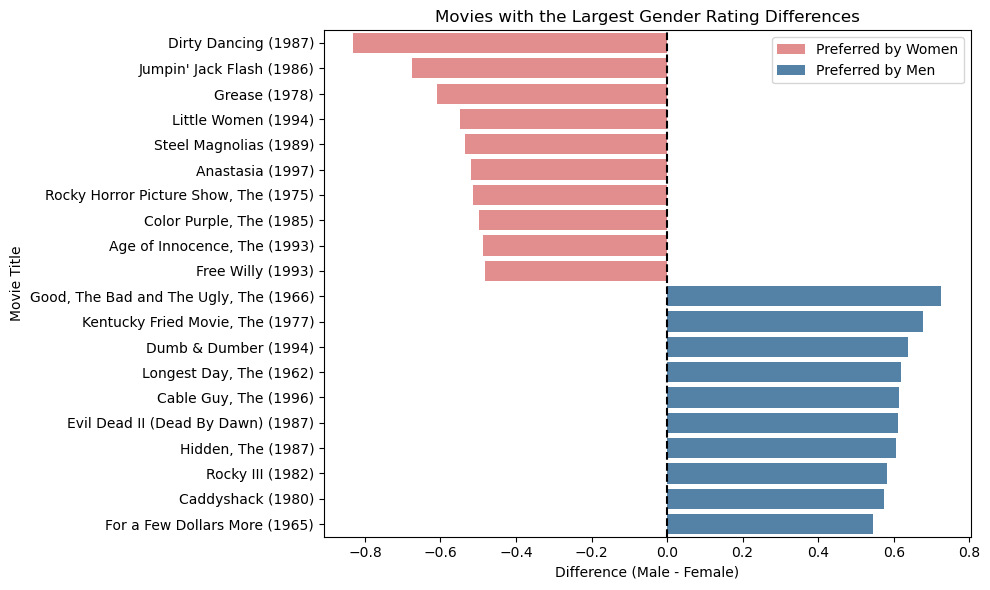

In [7]:
# Tính chênh lệch diff = M - F
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

# Top 10 phim nữ thích hơn (diff âm) và nam thích hơn (diff dương)
top_female_diff = mean_ratings.sort_values('diff').head(10).reset_index()
top_male_diff = mean_ratings.sort_values('diff', ascending=False).head(10).reset_index()

# Vẽ biểu đồ đối xứng
plt.figure(figsize=(10,6))
sns.barplot(data=top_female_diff, x='diff', y='title', color='lightcoral', label='Preferred by Women')
sns.barplot(data=top_male_diff, x='diff', y='title', color='steelblue', label='Preferred by Men')

plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Difference (Male - Female)')
plt.ylabel('Movie Title')
plt.title('Movies with the Largest Gender Rating Differences')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [15]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_24560\2356224752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_controversial, x='rating', y='title', palette='coolwarm')


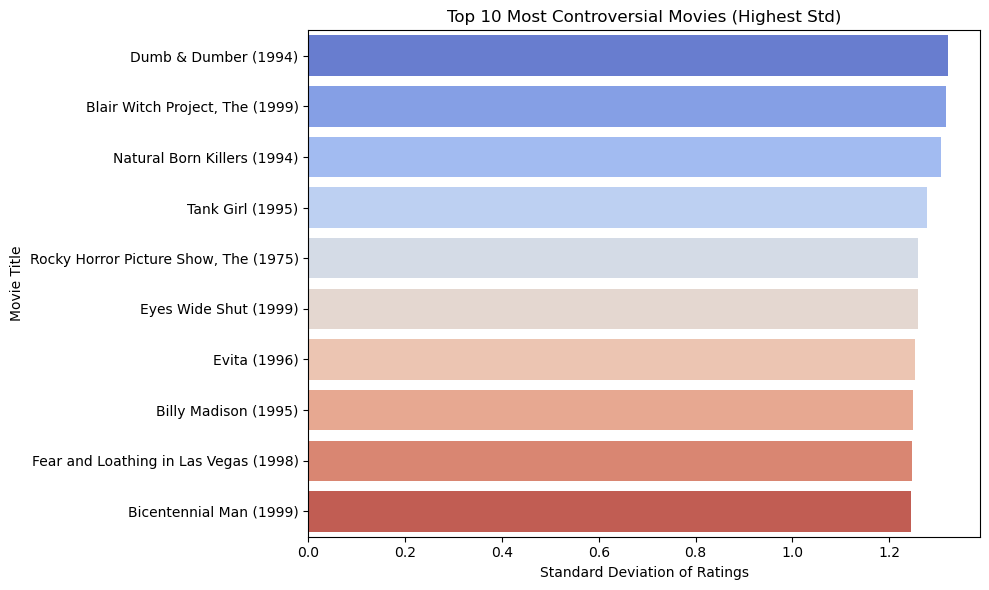

In [8]:
# Tính độ lệch chuẩn (std) theo phim
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]

# Top 10 phim có std cao nhất
most_controversial = rating_std_by_title.sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=most_controversial, x='rating', y='title', palette='coolwarm')
plt.xlabel('Standard Deviation of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Controversial Movies (Highest Std)')
plt.tight_layout()
plt.show()


In [16]:
movies["genres"].head()
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [17]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


#### 3.4 

In [18]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


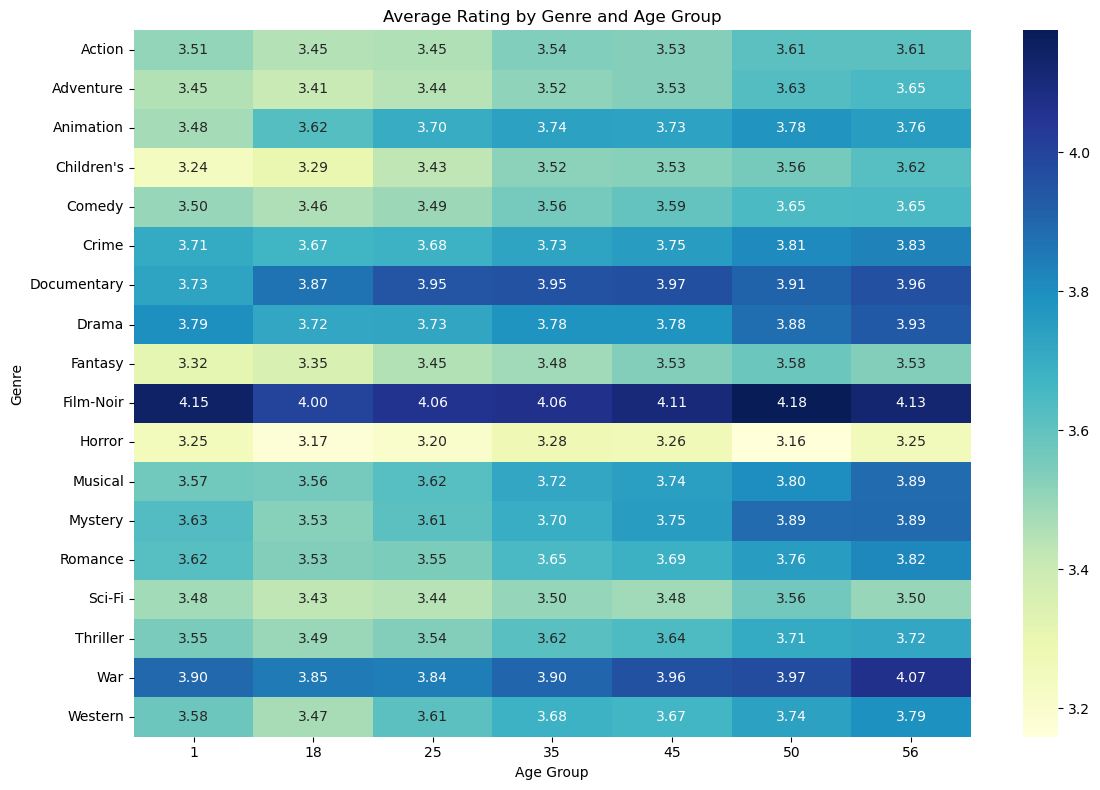

In [10]:
# Xử lý dữ liệu thể loại
movies['genre'] = movies['genres'].str.split('|')
movies_exploded = movies.explode('genre')

# Kết hợp với ratings + users
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)

# Tính điểm trung bình cho từng cặp (thể loại, tuổi)
genre_ratings = (ratings_with_genre.groupby(['genre', 'age'])['rating']
                 .mean().unstack('age'))

plt.figure(figsize=(12,8))
sns.heatmap(genre_ratings, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Average Rating by Genre and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
